In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

### Информация о датасете

- В .csv файле хранятся данные геофизических исследований (https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D1%80%D0%BE%D1%82%D0%B0%D0%B6) для набора скважин
- Колонка 'WELLNAME' соответствует названию скажины (ID временного ряда)
- Колонка 'DEPT' глубина измерения сигнала, м (аналог времени)
- Колонка 'target' - разметка сегментов временного ряда
- Колонки 'DENS' и 'DEN' - плотностной каротаж, g/cm3
- Колонки 'DT' и 'SONIC' - кривые акустического каротажа, us/ft
- Колонки 'FLGR' и 'GR' - гамма-каротаж (измерения радиоактивных свойств пород), gAPI
- Колонки 'CALI' и 'CAL' - измерение размера скважины вдоль ствола, inches
- Колонки 'RESD' и 'RES_DEP' - кривые электрического сопротивления, ohm*m

*однотипные картоажные данные отличаются измерительными приборами, с помощью которых проводились исследования

In [37]:
df = pd.read_csv('data/groningen_test.csv')

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

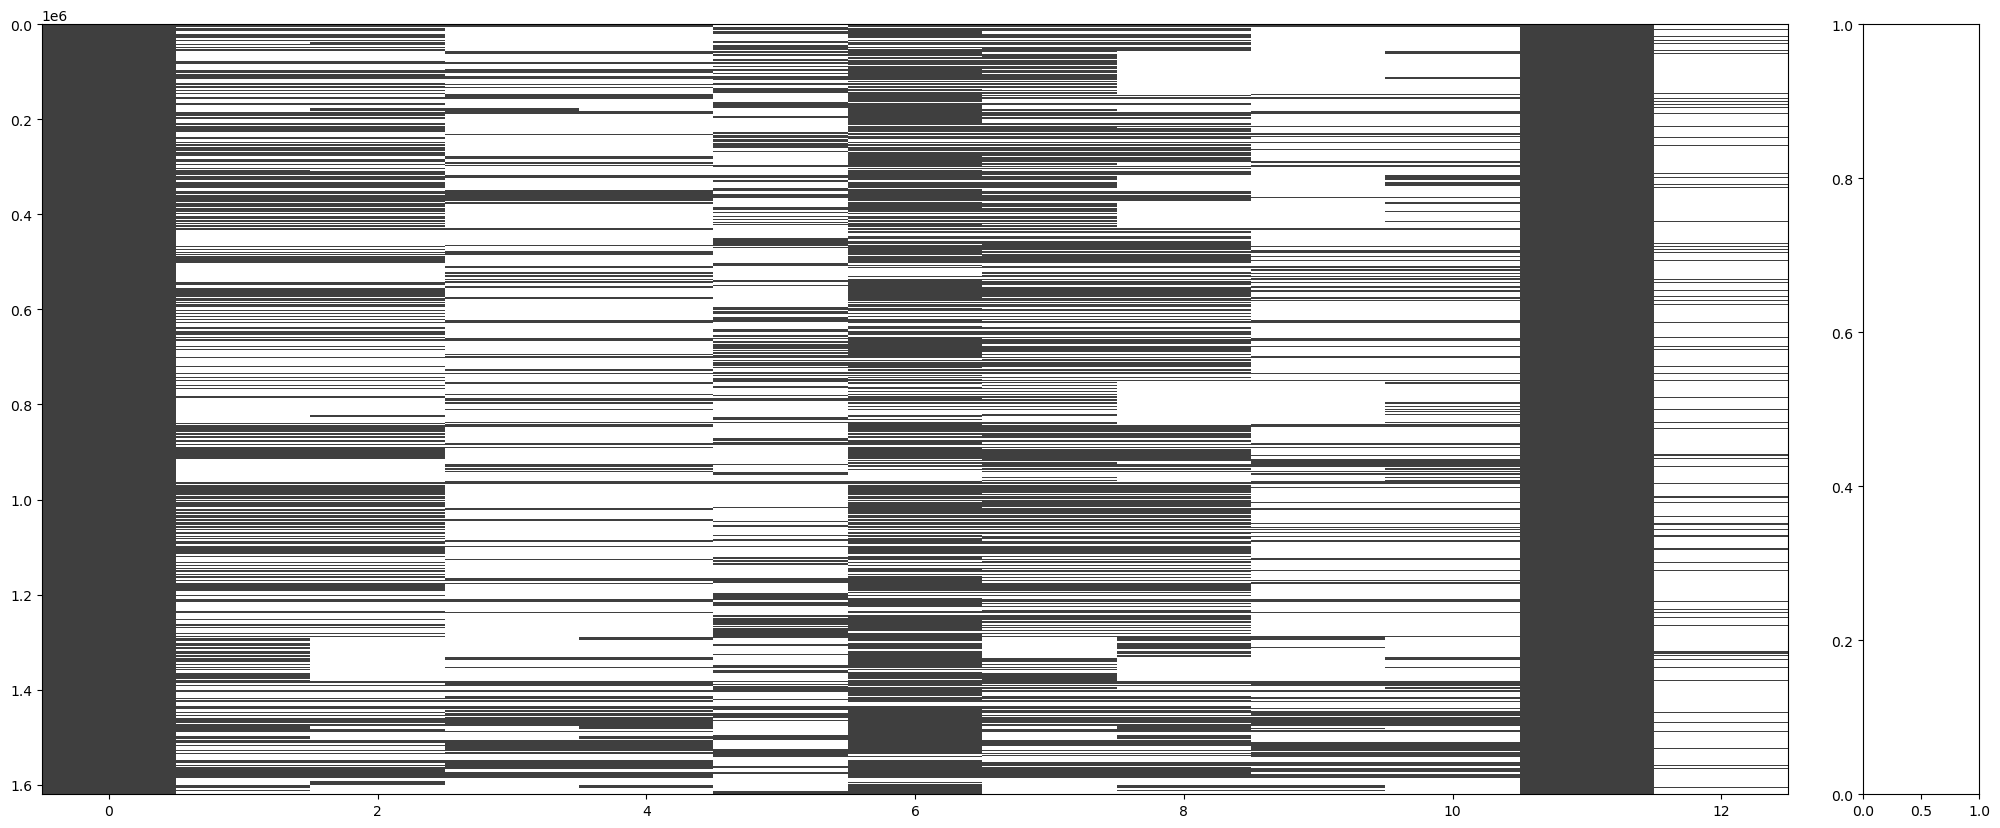

In [38]:
msno.matrix(df, labels=True)

### Пример "временного" ряда и разметки

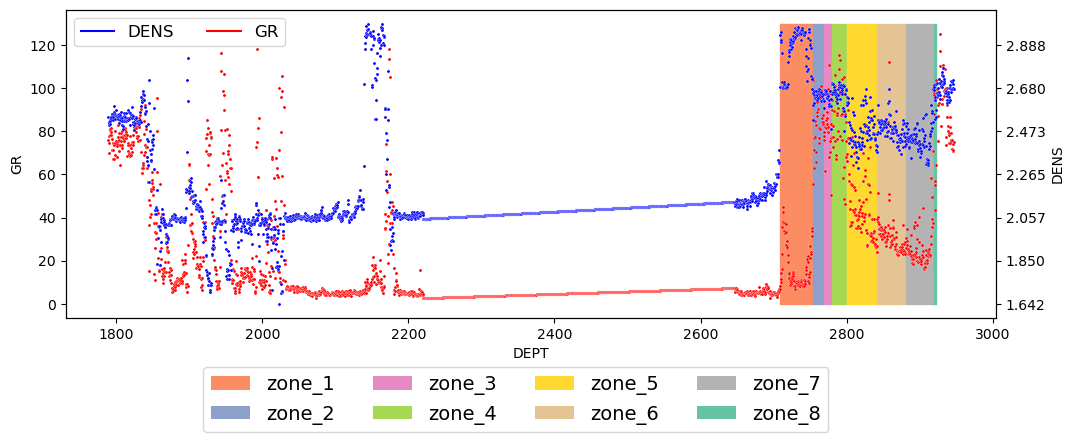

In [40]:
fig, axn = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 4))

well = df[df.WELLNAME == 'EKL-2']
for i in range(len(well.target.unique())):
    if well.target.unique()[i] is not None:
        start_depth = well[well.target == well.target.unique()[i]]['DEPT'].min()
        end_depth = well[well.target == well.target.unique()[i]]['DEPT'].max()
        axn.fill_between(
            [start_depth, end_depth], [0,0], [130,130],
            color = sns.color_palette('Set2', 9)[i]
        )
        

axn.set(xlabel = None)

ax1 = axn.twinx()
sns.scatterplot(
    data=df[df.WELLNAME == 'EKL-2'], x='DEPT', y='GR',ax=axn, color='red', s=5   
)
sns.scatterplot(
    data=df[df.WELLNAME == 'EKL-2'], x='DEPT', y='DENS', ax=ax1, color='blue', s=5
)

ylim1 = axn.get_ylim()
len1 = ylim1[1]-ylim1[0]
yticks1 = axn.get_yticks()
rel_dist = [(y-ylim1[0])/len1 for y in yticks1]
ylim2 = ax1.get_ylim()
len2 = ylim2[1]-ylim2[0]
yticks2 = [ry*len2+ylim2[0] for ry in rel_dist]

ax1.set_yticks(yticks2)
ax1.set_ylim(ylim2)

axn.legend(handles=[
    Line2D([], [], marker='', color='blue', label='DENS'),
    Line2D([], [], marker='', color='red', label='GR')
], fontsize = 12, ncol = 2)



legend_elements = [Patch(facecolor = sns.color_palette('Set2', 9)[i], label = f'zone_{i}') for i in range(len(well.target.unique()))]

fig.legend(handles = legend_elements[1:], loc ='lower center', fontsize = 14,
            bbox_to_anchor = (0, -0.2, 1, 1) ,ncol = 4)

### Задача
- расширить признаковое пространство используя методы feature engineering для временных рядов
- предложить алгоритм сегментации временных рядов (Continuous wavelet transform, алгоритмы change point detection, и др.)
- предложить способ оценки качества работы алгоритма
- проверить эффективность работы алгоритма на случайно выбранных временных рядах (скважинах)
- оценку проводить на размеченых участках

Целевое качество работы алгоритма - определение границ с абсолютной ошибкой не более $\pm$ 15 м

### Отправка решений

Решение отправлять в виде ссылки на открытый репозиторий github на почту maria.subbotina@aramcoinnovations.com

В репозитоии должны присутствовать:
- воспроизводимый jupyter notebook
- краткое описание предложенного решения (внутри jupyter notebook или отдельным файлом)
- необходимые .py файлы если таковые имеются
- файл requirements.txt для создания окружения